# EE634 Intro to Neural Networks
# Assignment #2: TensorFlow
# Zachary Chou
## Fall 2023

In [63]:
# Import libraries 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import SimpleRNN, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Read the csv file into the two-dimensional array 
data = np.genfromtxt('glass.data.csv',delimiter = ',')

print(data) 

[[  1.        1.52101  13.64    ...   0.        0.        1.     ]
 [  2.        1.51761  13.89    ...   0.        0.        1.     ]
 [  3.        1.51618  13.53    ...   0.        0.        1.     ]
 ...
 [212.        1.52065  14.36    ...   1.64      0.        7.     ]
 [213.        1.51651  14.38    ...   1.57      0.        7.     ]
 [214.        1.51711  14.23    ...   1.67      0.        7.     ]]


In [3]:
# print the shape of the array
print(data.shape)

(214, 11)


In [4]:
# Assign the X and Y labels and show their shape
X = data[:,0:10]
y = data[:,10]

print(X.shape,y.shape)

(214, 10) (214,)


In [5]:
# Show the first five rows of X 
print(data[0:5,:])

[[1.00000e+00 1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01
  6.00000e-02 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [2.00000e+00 1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01
  4.80000e-01 7.83000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [3.00000e+00 1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01
  3.90000e-01 7.78000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [4.00000e+00 1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01
  5.70000e-01 8.22000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [5.00000e+00 1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01
  5.50000e-01 8.07000e+00 0.00000e+00 0.00000e+00 1.00000e+00]]


In [6]:
# Show unique values of y
print(np.unique(y))

[1. 2. 3. 5. 6. 7.]


In [7]:
# Summary statistics 
mean_vals = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)

print('Mean Values:', np.round(mean_vals, 4))
print('Standard Deviation:', np.round(std_dev,4))
print('Min Values:', np.round(min_vals, 4))
print('Max Values:', np.round(max_vals,4))

Mean Values: [1.07500e+02 1.51840e+00 1.34079e+01 2.68450e+00 1.44490e+00 7.26509e+01
 4.97100e-01 8.95700e+00 1.75000e-01 5.70000e-02]
Standard Deviation: [6.17758e+01 3.00000e-03 8.14700e-01 1.43900e+00 4.98100e-01 7.72700e-01
 6.50700e-01 1.41980e+00 4.96100e-01 9.72000e-02]
Min Values: [ 1.      1.5112 10.73    0.      0.29   69.81    0.      5.43    0.
  0.    ]
Max Values: [214.       1.5339  17.38     4.49     3.5     75.41     6.21    16.19
   3.15     0.51  ]


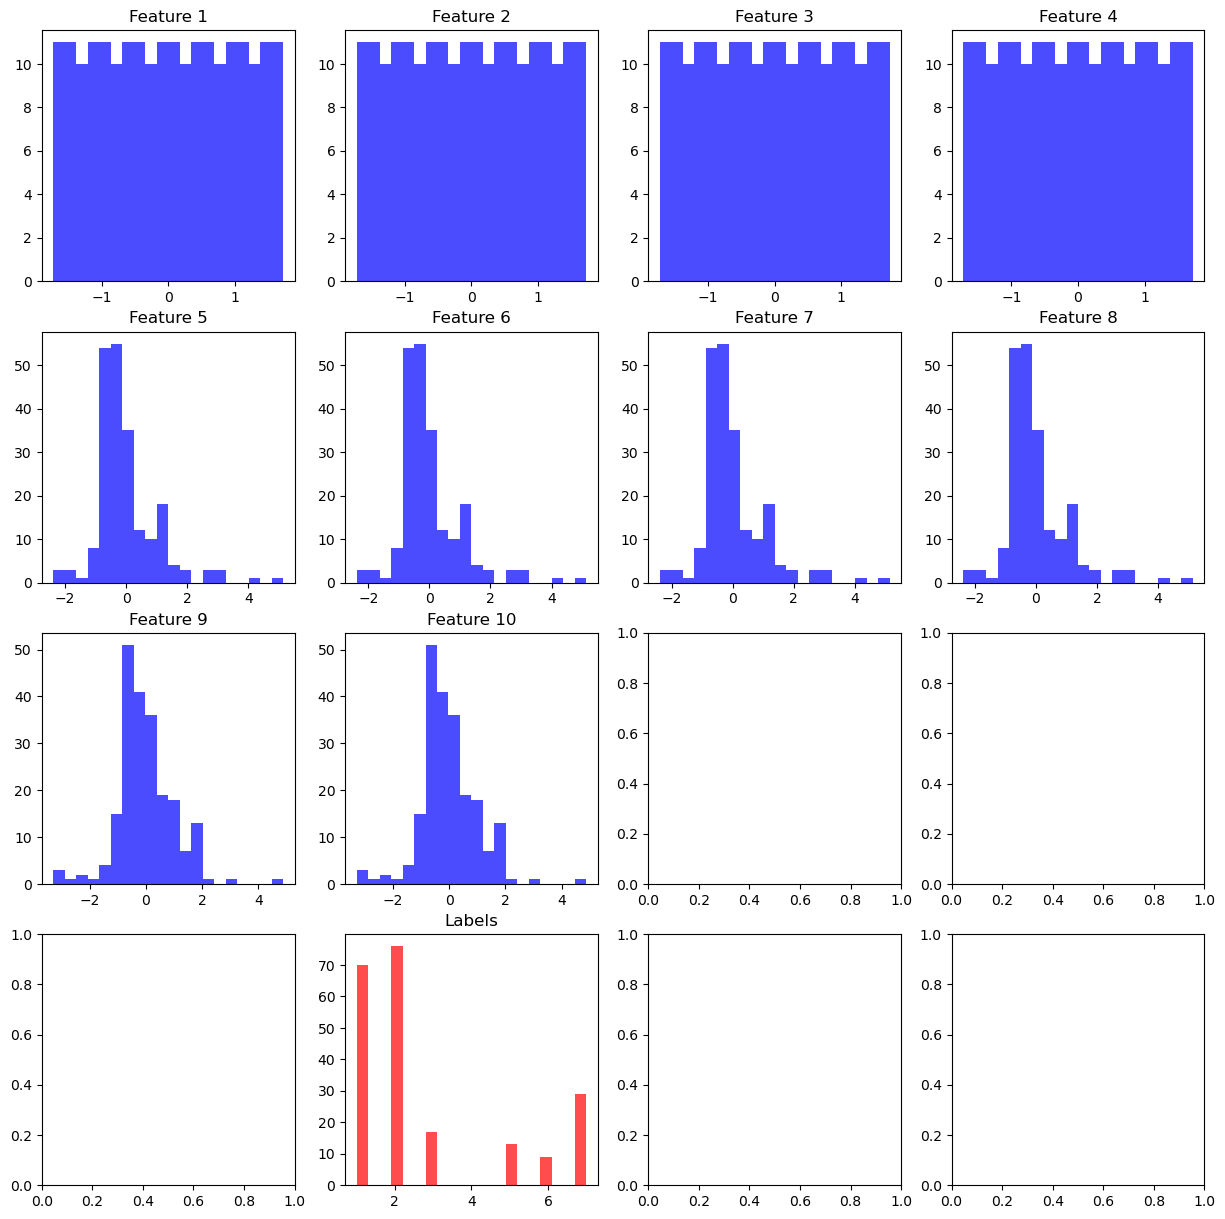

In [21]:
# Plot for each summary 
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(4):
        counter = counter + 1
        if counter > X.shape[1]: break
        axs[i, j].hist(X[:, i], bins=20, color='blue', alpha=0.7)
        axs[i, j].set_title(f'Feature {counter}')
        
axs[3, 1].hist(y, bins=20, color='red', alpha=0.7)
axs[3, 1].set_title('Labels')

plt.show()

In [9]:
# Reshape y array 
Y = y.reshape(-1,1)
display(Y)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

In [10]:
# Performing normalization/standardization 
scaler = StandardScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

print('Normalized X data is \n',X)
print('\nNormalized y data is \n',Y)

Normalized X data is 
 [[-1.72397593  0.87286765  0.28495326 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-1.70778837 -0.24933347  0.59181718 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-1.6916008  -0.72131806  0.14993314 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 1.6916008   0.75404635  1.16872135 ... -0.36410319  2.95320036
  -0.5864509 ]
 [ 1.70778837 -0.61239854  1.19327046 ... -0.33593069  2.81208731
  -0.5864509 ]
 [ 1.72397593 -0.41436305  1.00915211 ... -0.23732695  3.01367739
  -0.5864509 ]]

Normalized y data is 
 [[-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.84827468]
 [-0.848274

In [11]:
# Correlation matrix for all the features 
cor_matrix = np.corrcoef(X,rowvar=False)
display(cor_matrix)

array([[ 1.00000000e+00, -7.22089320e-02,  3.75722439e-01,
        -6.50327847e-01,  4.90113290e-01,  6.12320786e-02,
         3.14875143e-03,  9.07999431e-02,  4.51001375e-01,
        -7.27942726e-02],
       [-7.22089320e-02,  1.00000000e+00, -1.91885379e-01,
        -1.22274039e-01, -4.07326034e-01, -5.42052200e-01,
        -2.89832711e-01,  8.10402696e-01, -3.86018912e-04,
         1.43009609e-01],
       [ 3.75722439e-01, -1.91885379e-01,  1.00000000e+00,
        -2.73731961e-01,  1.56793667e-01, -6.98088065e-02,
        -2.66086504e-01, -2.75442486e-01,  3.26602879e-01,
        -2.41346411e-01],
       [-6.50327847e-01, -1.22274039e-01, -2.73731961e-01,
         1.00000000e+00, -4.81798509e-01, -1.65926723e-01,
         5.39566728e-03, -4.43750026e-01, -4.92262118e-01,
         8.30595289e-02],
       [ 4.90113290e-01, -4.07326034e-01,  1.56793667e-01,
        -4.81798509e-01,  1.00000000e+00, -5.52372042e-03,
         3.25958446e-01, -2.59592010e-01,  4.79403902e-01,
        -7.

In [12]:
# One-hot encoder 
encoder = OneHotEncoder(sparse_output=False)
y_enc = encoder.fit_transform(Y.reshape(-1, 1))
print(y_enc.shape)
display(y_enc)

(214, 6)


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [24]:
# Train/Test 
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=47, stratify = y)

print("X_train= \n", X_train)
print("\nX_test= \n", X_test)
print("\ny_train= \n", y_train)
print("\ny_test= \n", y_test)

X_train= 
 [[-0.47753324 -0.69161273 -0.50061837 ... -0.64582815 -0.35287683
  -0.5864509 ]
 [ 1.40022459 -0.38795831  1.64742906 ... -0.30071507  2.85240533
   0.23650315]
 [-0.44515811 -0.81373462 -0.72156039 ... -0.69513002 -0.35287683
  -0.5864509 ]
 ...
 [-1.14122351  0.23915407  0.59181718 ... -0.12463697 -0.13112775
  -0.5864509 ]
 [ 1.52972513 -0.60579735 -1.78944683 ... -0.01899011 -0.35287683
  -0.5864509 ]
 [-1.27072405 -0.22622933 -1.04069887 ... -0.29367195 -0.35287683
  -0.5864509 ]]

X_test= 
 [[-0.16996946  0.01471385 -0.47606926  0.65006624 -0.7727468  -0.40238243
   0.21968855  0.12187238 -0.35287683  0.95658795]
 [ 0.78509702 -0.62890149 -0.45152014  0.49718589 -0.37122242  0.46466886
   0.0352622  -0.26549945 -0.35287683 -0.5864509 ]
 [-0.93078513  0.20284757  0.21130592  0.46244035 -0.43145108 -0.73885009
   0.14284424 -0.03307635 -0.35287683 -0.5864509 ]
 [ 0.54228351 -0.48367547 -0.095558    0.59447339  0.33144524 -0.14356115
   0.281164   -0.59652629 -0.35287683

In [25]:
# Build the neural network model
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                176       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 6)                 30        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 0s 58ms/step - loss: 0.9657 - accuracy: 0.5441 - val_loss: 0.9038 - val_accuracy: 0.5714
Epoch 2/50
5/5 [==============================] - 0s 26ms/step - loss: 0.9539 - accuracy: 0.5441 - val_loss: 0.8969 - val_accuracy: 0.5714
Epoch 3/50
5/5 [==============================] - 0s 27ms/step - loss: 0.9426 - accuracy: 0.5515 - val_loss: 0.8906 - val_accuracy: 0.5714
Epoch 4/50
5/5 [==============================] - 0s 26ms/step - loss: 0.9314 - accuracy: 0.5662 - val_loss: 0.8850 - val_accuracy: 0.5714
Epoch 5/50
5/5 [==============================] - 0s 26ms/step - loss: 0.9201 - accuracy: 0.5735 - val_loss: 0.8770 - val_accuracy: 0.6000
Epoch 6/50
5/5 [==============================] - 0s 26ms/step - loss: 0.9092 - accuracy: 0.5809 - val_loss: 0.8706 - val_accuracy: 0.6000
Epoch 7/50
5/5 [==============================] - 0s 27ms/step - loss: 0.8982 - accuracy: 0.5809 - val_loss: 0.8645 - val_accuracy: 0.6000
Epoch 8/50
5/5 [===========

In [49]:
# Evaluate the model's performance on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.5933 - accuracy: 0.8837
Test Loss: 0.5933053493499756
Test Accuracy: 0.8837209343910217
2/2 [==============================] - 0s 7ms/step
(43, 6) (43, 6)


In [50]:
# Plot confusion matrix and the classification report 
predictions = model.predict(X_test)
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1)))

print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

2/2 [==============================] - 0s 6ms/step
[[14  0  0  0  0  0]
 [ 1 14  0  0  0  0]
 [ 0  1  1  1  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        15
           2       1.00      0.33      0.50         3
           3       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         2
           5       0.86      1.00      0.92         6

    accuracy                           0.88        43
   macro avg       0.72      0.71      0.68        43
weighted avg       0.86      0.88      0.86        43



C:\Users\choub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


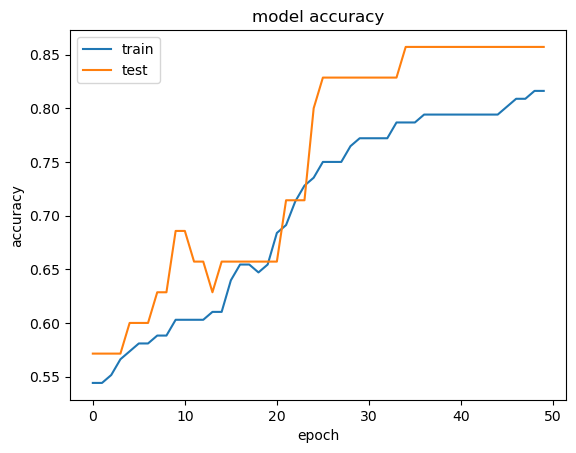

In [51]:
# Visualize the model training history for the accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

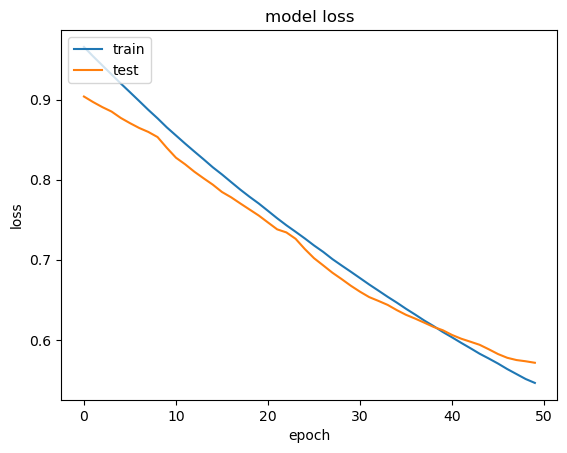

In [52]:
# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Comment on overfitting and why 
# The model is overfitting since the model learns the training data better than the test 
# at later epochs wince the test graph is above the train at later epochs. 
# This means that the model learned the training data better than unseen data which
# performs not so well. 

In [83]:
# Trying a different architecture and comparing results, RNN and showing the results in the following cells
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=47, stratify = y)

print("X_train= \n", X_train)
print("\nX_test= \n", X_test)
print("\ny_train= \n", y_train)
print("\ny_test= \n", y_test)

X_train= 
 [[-0.47753324 -0.69161273 -0.50061837 ... -0.64582815 -0.35287683
  -0.5864509 ]
 [ 1.40022459 -0.38795831  1.64742906 ... -0.30071507  2.85240533
   0.23650315]
 [-0.44515811 -0.81373462 -0.72156039 ... -0.69513002 -0.35287683
  -0.5864509 ]
 ...
 [-1.14122351  0.23915407  0.59181718 ... -0.12463697 -0.13112775
  -0.5864509 ]
 [ 1.52972513 -0.60579735 -1.78944683 ... -0.01899011 -0.35287683
  -0.5864509 ]
 [-1.27072405 -0.22622933 -1.04069887 ... -0.29367195 -0.35287683
  -0.5864509 ]]

X_test= 
 [[-0.16996946  0.01471385 -0.47606926  0.65006624 -0.7727468  -0.40238243
   0.21968855  0.12187238 -0.35287683  0.95658795]
 [ 0.78509702 -0.62890149 -0.45152014  0.49718589 -0.37122242  0.46466886
   0.0352622  -0.26549945 -0.35287683 -0.5864509 ]
 [-0.93078513  0.20284757  0.21130592  0.46244035 -0.43145108 -0.73885009
   0.14284424 -0.03307635 -0.35287683 -0.5864509 ]
 [ 0.54228351 -0.48367547 -0.095558    0.59447339  0.33144524 -0.14356115
   0.281164   -0.59652629 -0.35287683

In [84]:
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(None, 1)))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 16)                288       
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 6)                 54        
                                                                 
Total params: 478
Trainable params: 478
Non-trainable params: 0
_________________________________________________________________


In [92]:
history_RNN = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 0s 70ms/step - loss: 0.3202 - accuracy: 0.4485 - val_loss: 0.3352 - val_accuracy: 0.4857
Epoch 2/50
5/5 [==============================] - 0s 42ms/step - loss: 0.3140 - accuracy: 0.4632 - val_loss: 0.3301 - val_accuracy: 0.4857
Epoch 3/50
5/5 [==============================] - 0s 37ms/step - loss: 0.3068 - accuracy: 0.4706 - val_loss: 0.3233 - val_accuracy: 0.4571
Epoch 4/50
5/5 [==============================] - 0s 39ms/step - loss: 0.3004 - accuracy: 0.5000 - val_loss: 0.3164 - val_accuracy: 0.5143
Epoch 5/50
5/5 [==============================] - 0s 41ms/step - loss: 0.2968 - accuracy: 0.5147 - val_loss: 0.3089 - val_accuracy: 0.4857
Epoch 6/50
5/5 [==============================] - 0s 31ms/step - loss: 0.2892 - accuracy: 0.5147 - val_loss: 0.3049 - val_accuracy: 0.5143
Epoch 7/50
5/5 [==============================] - 0s 47ms/step - loss: 0.2872 - accuracy: 0.5147 - val_loss: 0.2975 - val_accuracy: 0.5714
Epoch 8/50
5/5 [===========

In [93]:
# Loss and accuracy
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict(X_test_reshaped)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 14ms/step - loss: 0.1523 - accuracy: 0.8372
Test Loss: 0.15225379168987274
Test Accuracy: 0.8372092843055725
2/2 [==============================] - 0s 14ms/step
(43, 6) (43, 6)


In [94]:
# Plot confusion matrix and the classification report 
predictions = model.predict(X_test_reshaped)
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1)))

print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

2/2 [==============================] - 0s 119ms/step
[[14  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.75      1.00      0.86        15
           2       0.00      0.00      0.00         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         2
           5       0.75      1.00      0.86         6

    accuracy                           0.84        43
   macro avg       0.58      0.56      0.54        43
weighted avg       0.76      0.84      0.78        43



C:\Users\choub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


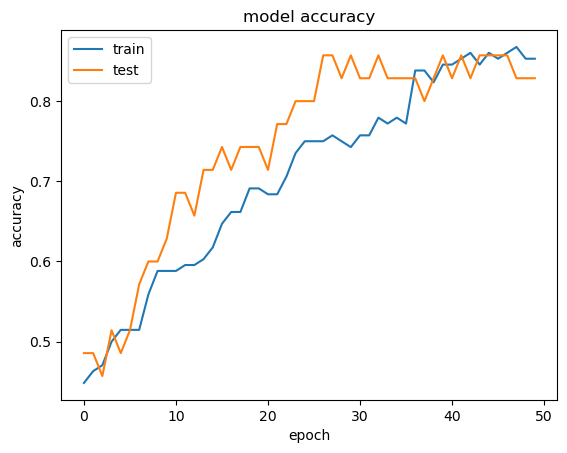

In [95]:
# Visualize the model training history for the accuracy 
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

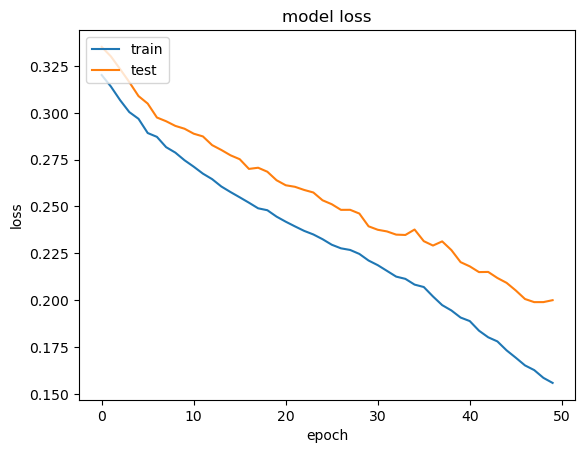

In [96]:
# Loss graph
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# The first NN architecture and the RNN results were similar. 
# The RNN had more overfitting than the first NN architecture
# The first NN architecture had slightly better accuracy than the RNN
# according to the classification report but not by much. 

## DUE DATE: Wednesday, October 4, 2023